In [ ]:
# Checkout www.pygimli.org for more examples


# GIMLi basics

This is the first tutorial where we demonstrate the general use of
:term:`GIMLi` in Python, i.e., :term:`pyGIMLi`.

The modelling as well as the inversion part of :term:`GIMLi` often requires a
spatial discretization for the domain of interest, the so called
:gimliapi:`GIMLI::Mesh`.
This tutorial shows some basic aspects of handling a mesh.

First, the library needs to be imported.
To avoid name clashes with other libraries we suggest to ``import pygimli`` and
alias it to the simple abbreviation ``pg``: CR


In [1]:
import pygimli as pg

Every part of the c++ namespace :gimliapi:`GIMLI` is bound to python and can
be used with the leading ``pg.``

For instance get the current version for :term:`GIMLi` with:



In [2]:
print(pg.__version__)

1.5.0


Now that we know the name space :gimliapi:`GIMLI`, we can create a first mesh.
A mesh is represented by a collection of nodes, cells and boundaries,
i.e., geometrical entities.

<div class="alert alert-info"><h4>Note</h4><p>A regularly spaced mesh consisting of rectangles or hexahedrons is
    usually called a grid. However, a grid is just a special variant of a mesh
    so GIMLi treats it the same. The only difference is how they are created.</p></div>

GIMLi provides a collection of tools for mesh import, export and generation.
A simple grid generation is built-in but we also provide wrappers for
unstructured mesh generations, e.g., :term:`Triangle`, :term:`Tetgen` and
:term:`Gmsh`. To create a 2d grid you need to give two arrays/lists of sample points
in x and y direction, in that order, or just numbers.



In [3]:
grid = pg.createGrid(x=[-1.0, 0.0, 1.0, 4.0], y=[-1.0, 0.0, 1.0, 4.0])

The returned object ``grid`` is an instance of :gimliapi:`GIMLI::Mesh` and
provides various methods for modification and io-operations. General
information about the grid can be printed using the simple print() function.




Mesh: Nodes: 16 Cells: 9 Boundaries: 24


(<Axes: >, None)

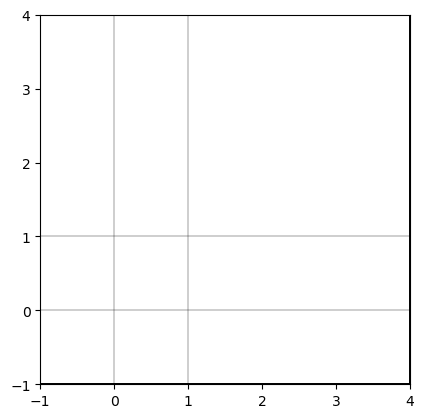

In [7]:
print(grid)
pg.viewer.show(grid)

Or you can access them manually using different methods:




In [8]:
print('Mesh: Nodes:', grid.nodeCount(),
      'Cells:', grid.cellCount(),
      'Boundaries:', grid.boundaryCount())

Mesh: Nodes: 16 Cells: 9 Boundaries: 24


You can iterate through all cells of the general type :gimliapi:`GIMLI::Cell`
that also provides a lot of methods. Here we list the number of nodes and the
node ids per cell:



In [6]:
for cell in grid.cells():
    print("Cell", cell.id(), "has", cell.nodeCount(),
          "nodes. Node IDs:", [n.id() for n in cell.nodes()])

print(type(grid.cell(0)))

Cell 0 has 4 nodes. Node IDs: [0, 1, 5, 4]
Cell 1 has 4 nodes. Node IDs: [1, 2, 6, 5]
Cell 2 has 4 nodes. Node IDs: [2, 3, 7, 6]
Cell 3 has 4 nodes. Node IDs: [4, 5, 9, 8]
Cell 4 has 4 nodes. Node IDs: [5, 6, 10, 9]
Cell 5 has 4 nodes. Node IDs: [6, 7, 11, 10]
Cell 6 has 4 nodes. Node IDs: [8, 9, 13, 12]
Cell 7 has 4 nodes. Node IDs: [9, 10, 14, 13]
Cell 8 has 4 nodes. Node IDs: [10, 11, 15, 14]
<class 'pgcore._pygimli_.Quadrangle'>


To generate the input arrays ``x`` and ``y``, you can use the
built-in :gimliapi:`GIMLI::Vector` (pre-defined with values that are type double as
``pg.Vector``), standard python lists or :term:`numpy` arrays,
which are widely compatible with :term:`GIMLi` vectors.



In [9]:
import numpy as np

grid = pg.createGrid(x=np.linspace(-1.0, 1.0, 10),
                     y=1.0 - np.logspace(np.log10(1.0), np.log10(2.0), 10))

We can find that this new ``grid`` contains




81


(<Axes: >, None)

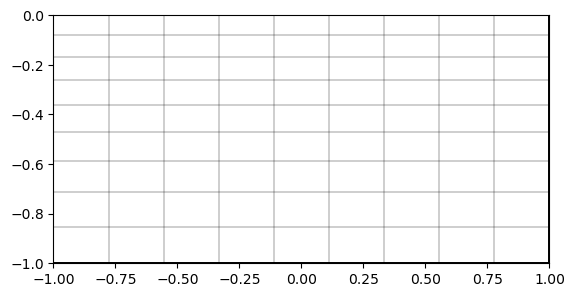

In [11]:
print(grid.cellCount())
pg.viewer.show(grid)

rectangles of type :gimliapi:`GIMLI::Quadrangle` derived from the
base type :gimliapi:`GIMLI::Cell`, edges of type :gimliapi:`GIMLI::Edge`, 
which are boundaries of the general type :gimliapi:`GIMLI::Boundary`.




In [12]:
print(grid.boundaryCount())

180


The mesh can be saved and loaded in our binary mesh format ``.bms``.
Or exported into ``.vtk`` format for 2D or 3D visualization using
:term:`Paraview`.

However, we recommend visualizing 2-dimensional content using python scripts
that provide better exports to graphics files (e.g., png, pdf, svg).
In :term:`pygimli` we provide some basic post-processing routines using
the :term:`matplotlib` visualization framework. The main visualization call
is :py:mod:`pygimli.viewer.show` which is sufficient for most meshes,
fields, models and streamline views.



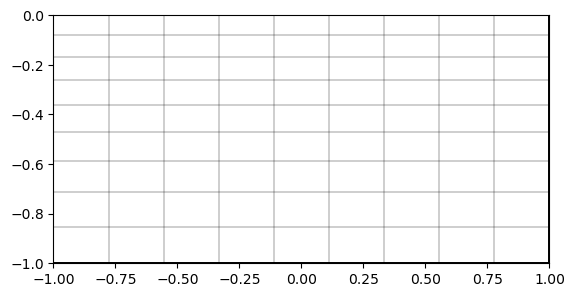

In [13]:
pg.viewer.show(grid)
pg.wait()

For more control you can also use the appropriate draw methods
:py:mod:`pygimli.viewer.mpl.drawMesh`.

